In [ ]:
# *ULANGAN AKHIR SEMESTERgit*
## Machine Learning

<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/LOGO_UEU_BY_ASU-06.png" width=50% height=50%>

<table style="width:75%">
  <tr>
    <td><b>Dosen Pengampu</b></td>
    <td>Jefry Sunupurwa Asri , S.Kom., M.Kom.</td>
   </tr>
  <tr>
    <td><b>Mahasiswa</b></td>
    <td>Anisa Riska Septiyana</td>
  </tr>
  <tr>
    <td><b>NIM</b></td>
    <td>20210801446</td>
  </tr>
</table>

**SOAL STUDI KASUS : (60 Poin)**

Periksalah nim anda misalkan nim anda adalah 20210801446. Silahkan cek 2 digit terakhir apakah berakhiran genap atau ganjil, karena disini berakhiran angka 46 dan 
masuk kategori genap maka anda mengerjakan soal genap. Kumpulkan juga hasil running dan penjelasan terkait step yang dilakukan dalam pengolahan text tersebut.

In [1]:
# Define the ID number
id_number = "20210801446"

# Extract the last two digits of the ID number
last_two_digits = int(id_number[-2:])

# Determine if the last two digits are even or odd
if last_two_digits % 2 == 0:
    category = "even"
else:
    category = "odd"

# Conclude whether the person will be given even or odd-numbered questions
if category == "even":
    question_category = "even-numbered"
else:
    question_category = "odd-numbered"

print(f"The person will be given {question_category} questions.")

The person will be given even-numbered questions.


**Soal untuk NIM Genap**

Dengan menggunakan Jupyter Notebook lakukan pengolahan text dari url berikut ini 
https://shared.djambred.my.id/uas-nim-genap.txt
olah text tersebut sehingga dapat mengeluarkan hasil wordcloud, barplot frekuensi kata yang sering digunakan, plot terkait sentiment feel text tersebut.

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [10]:
from wordcloud import WordCloud

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [12]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
import nltk

In [13]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/user/nltk_data...


True

In [15]:
text = "Once upon a time in a faraway palace, there lived a beautiful princess\n She was very pretty, with blue eyes and long black hair.Her skin was smooth and white, so she was called Snow White. Snow White has a stepmother who was always jealous with her beauty, while her father has passed away. Her Stepmother was cruel. She had a magic mirror that could say who was the most beautiful women in the country.One day, her stepmother asked to magic mirror that which woman was the most beautiful in the country.The magic mirror answered that Snow White was the most beautiful woman.Her stepmother was very angry, then asked her servant to get rid of snow white from this kingdom.The servant was asked to kill snow white in the woods but the servant didnâ€™t do it. He just took snow white into the wood and left her alone but her stepmother didnâ€™t know that snow white was still alive.In the forest, Snow White was alone and scared. She did not know where she should go. Suddenly she saw a quaint little cottage. She wondered who lived there and then she decided to get into the house.In the house, she saw 7 small beds and a kitchen. Snow White cleaned up the house such as washing clothes, cleaned the bed and others. After working so hard, she went to bed and slept there. In the afternoon, the seven dwarfs who lived in the cottage went home. They were surprised to see there was a young woman there. One of them waked her up and asked who she was. Snow White told them her sad story. The seven dwarfs felt pity on Snow White and they asked her to stay with them in the house.While in the palace, then stepmother asked the magic mirror one again who the most beautiful woman in the kingdom was. The magic mirror answered that Snow White was still alive and lived in a small house with the seven dwarfs. She was still the most beautiful woman in the world. The stepmother was angry and she planed something bad for Snow White.Then stepmother disguised herself as an old woman who sold poisoned apple and went to the dwarfâ€™s house. Before the seven dwarfs went to work, they warned Snow White not to open the door to strangers. When her stepmother arrived to the house, she began offering Snow Whiteâ€™s apple.Snow White refused to open the door but her stepmother forced her. Snow white felt sorry to her and opened the door. She took the apple from her mother and ate it. After eating the poisoned apple, she fainted and felt to the ground with the poisoned apple on her side.In the evening, when the seven dwarfs came home, they were surprised to see Snow White lying on the floor with a pale face and a poisoned apple beside her. The seven dwarfs were sad to see Snow White which was dying but she did not dead. Then the seven dwarfs decided to make a beautiful bed made of crystal to make Snow White still alive.Day by day, the seven dwarfs were waiting for a miracle to come so that Snow White could get back from her faint.  Then one day, there was a traveler who was actually a prince of another kingdom that was so far. He saw a beautiful woman laid on a bed of crystals. The prince also asked what happened to the girl to the dwarfs. Then the dwarfs told him what had happened to Snow White.Hearing the story, the prince was so sad. He was coming closer to snow white. He felt sorry and kissed her. Suddenly Snow White came to. The curse was broken by the princeâ€™s kiss. The dwarfs were so happy.Then the prince asked Snow White to come to his place and marry her.Finally they lived happily ever after."

processes_text = text.replace("â€™", "'")

print(processes_text)

Once upon a time in a faraway palace, there lived a beautiful princess
 She was very pretty, with blue eyes and long black hair.Her skin was smooth and white, so she was called Snow White. Snow White has a stepmother who was always jealous with her beauty, while her father has passed away. Her Stepmother was cruel. She had a magic mirror that could say who was the most beautiful women in the country.One day, her stepmother asked to magic mirror that which woman was the most beautiful in the country.The magic mirror answered that Snow White was the most beautiful woman.Her stepmother was very angry, then asked her servant to get rid of snow white from this kingdom.The servant was asked to kill snow white in the woods but the servant didn't do it. He just took snow white into the wood and left her alone but her stepmother didn't know that snow white was still alive.In the forest, Snow White was alone and scared. She did not know where she should go. Suddenly she saw a quaint little cotta

In [16]:
def preprocess_text(processes_text):
    processes_text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    processes_text = processes_text.lower()  # Mengubah huruf menjadi lowercase
    return processes_text

processed_text = preprocess_text(processes_text)

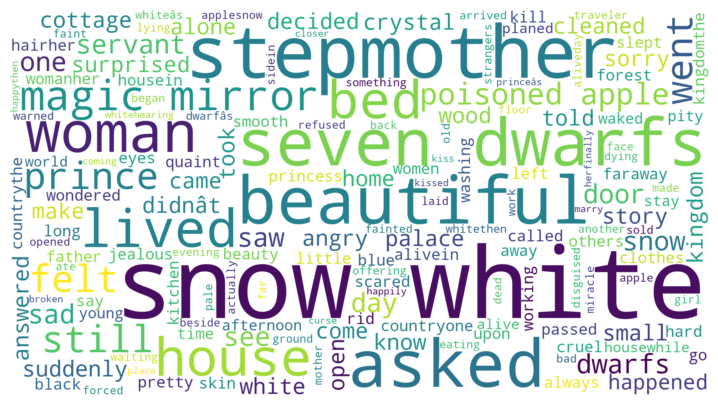

In [17]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=1960, height=1080, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(processed_text)

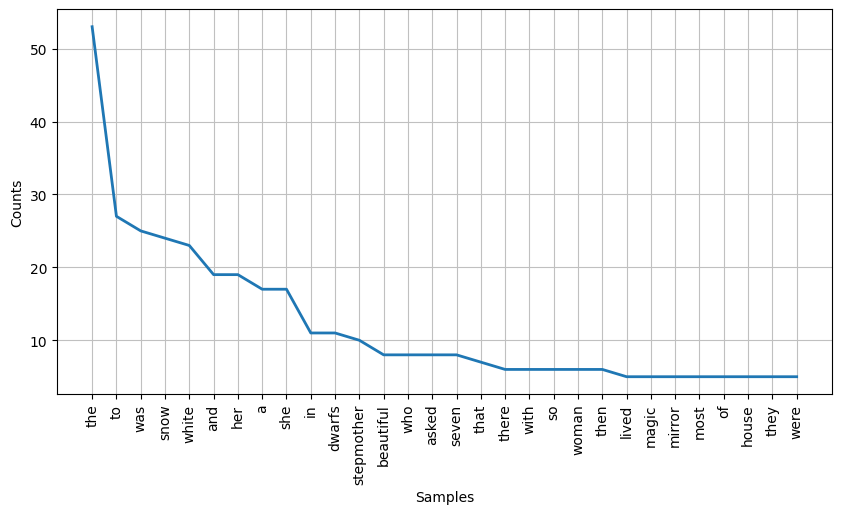

In [18]:
def create_barplot(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    plt.figure(figsize=(10, 5))
    fdist.plot(30, cumulative=False)
    plt.show()

create_barplot(processed_text)

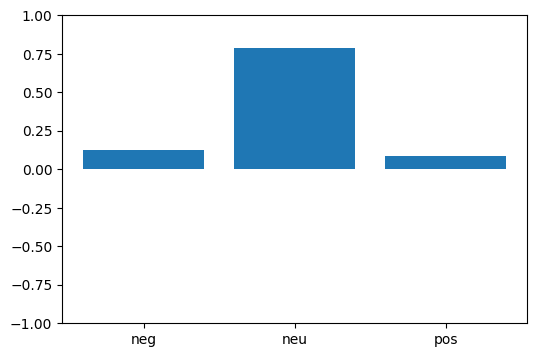

Sentimen negatif: 0.123
Sentimen netral: 0.788
Sentimen positif: 0.089


In [19]:
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_scores.pop('compound')
    
    plt.figure(figsize=(6, 4))
    plt.bar(sentiment_scores.keys(), sentiment_scores.values())
    plt.ylim(-1, 1)
    plt.show()
    
    for sentiment, score in sentiment_scores.items():
        if sentiment == 'neg':
            print("Sentimen negatif:", score)
        elif sentiment == 'neu':
            print("Sentimen netral:", score)
        elif sentiment == 'pos':
            print("Sentimen positif:", score)

analyze_sentiment(processed_text)